In [28]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [29]:
num_of_points = 800

In [30]:
points = np.random.uniform(-200, 200, [num_of_points, 2])
print(points.shape)

(800, 2)


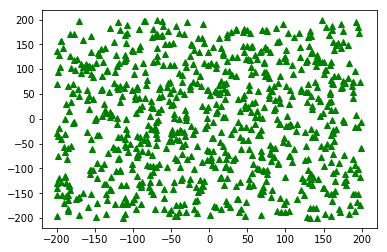

In [31]:
plt.plot(points[:,0], points[:, 1], 'g^')
plt.show()

In [32]:
# Lets Draw a Random Function

def inORout(point):
    if(point[0]**2 + point[1]**2 - 10000) > 0:
        return True
    else:
        return False

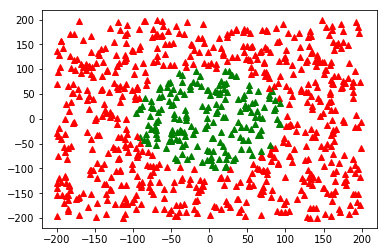

In [36]:
labels = np.zeros_like(points)

index = 0
for point in points:
    if(inORout(point)):
        plt.plot(point[0], point[1], 'r^')
        labels[index] = [1.0, 0.0]
    else:
        plt.plot(point[0], point[1], 'g^')
        labels[index] = [0.0, 1.0]
    index += 1

plt.show()

In [59]:
# ToDo

# 1. Make Points and classes
# 2. Make Deep NN
# 3. Train it on the Input
# 4. Calculate The Accuracy
# 5. Also Show the Output for Visualization
# 6. Include Droupout

In [60]:
# Show Some input/output pairs

print(points[10, :], labels[10, :])

[  15.60867793 -182.21824978] [ 1.  0.]


In [84]:
# Lets make a Neural Net
learning_rate = .01
num_of_epochs = 30
batch_size = 30

num_nodes_hidden_layer_1 = 10

x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 2])
keep_prob = tf.placeholder(tf.float32)

weights = {
            "input_to_hidden_1":tf.Variable(tf.random_normal([2,num_nodes_hidden_layer_1], dtype=tf.float32)) , 
            "hidden_1_to_output":tf.Variable(tf.random_normal([num_nodes_hidden_layer_1, 2], dtype=tf.float32))
          }

biases = {
            "hidden_1":tf.Variable(tf.zeros([1, num_nodes_hidden_layer_1], dtype=tf.float32)),
            "output":tf.Variable(tf.zeros([1, 2], dtype=tf.float32))
         }

hidden_output = tf.nn.relu(tf.add(tf.matmul(x, weights["input_to_hidden_1"]) , biases["hidden_1"]))
hidden_output = tf.nn.dropout(hidden_output, keep_prob) 

output = tf.add(tf.matmul(hidden_output, weights["hidden_1_to_output"]), biases["output"])

error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)

accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(output, 1), tf.argmax(y, 1)), 'float'))

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    
    num_of_iterations = int((points.shape[0]/batch_size))
    for k in range(num_of_epochs):
        print('\n\n' +  str(k + 1) + ' Iteration' + '\n\n')
        
        for i in range(num_of_iterations):
            print(session.run([optimizer,error], feed_dict={x:points[i * batch_size:(i * batch_size) + batch_size, :], y:labels[i * batch_size:(i * batch_size) + batch_size, :], keep_prob:0.5}))
    
    print('\n\n Accuracy of the System is ')
    accuracy_1, output_1 = session.run([accuracy, output], feed_dict={x:points, y:labels, keep_prob:1.0})
    print(accuracy_1)



1 Iteration


[None, 53.667812]
[None, 135.45987]
[None, 30.334606]
[None, 24.827646]
[None, 79.480156]
[None, 45.857231]
[None, 23.863634]
[None, 15.992089]
[None, 4.6858969]
[None, 26.995691]
[None, 13.341167]
[None, 44.189819]
[None, 16.764565]
[None, 10.541287]
[None, 29.893099]
[None, 4.9448323]
[None, 8.2799587]
[None, 24.790186]
[None, 35.98859]
[None, 13.564498]
[None, 11.453488]
[None, 12.468065]
[None, 6.7650924]
[None, 11.105865]
[None, 18.176924]
[None, 7.5391788]


2 Iteration


[None, 4.8593564]
[None, 6.7038593]
[None, 11.903646]
[None, 7.4429388]
[None, 11.966786]
[None, 2.2199457]
[None, 2.8653615]
[None, 2.3016839]
[None, 2.8317244]
[None, 4.7443557]
[None, 2.5252683]
[None, 1.3215858]
[None, 2.5304444]
[None, 3.8540118]
[None, 2.79549]
[None, 7.4592242]
[None, 6.3166513]
[None, 1.4538929]
[None, 3.6496308]
[None, 3.8729057]
[None, 5.7777591]
[None, 8.8549032]
[None, 5.3888035]
[None, 7.2044954]
[None, 2.2043557]
[None, 3.1652474]


3 Iteration


[None, 3.3662441]
[

[None, 0.53019559]
[None, 0.44941318]
[None, 0.45495069]
[None, 0.49168986]
[None, 0.46614531]
[None, 0.40378243]
[None, 0.44412532]
[None, 0.49101692]
[None, 0.43402079]
[None, 0.50698793]
[None, 0.43040809]
[None, 0.38611624]


19 Iteration


[None, 0.38549894]
[None, 0.55111092]
[None, 0.46057877]
[None, 0.33996904]
[None, 0.51388478]
[None, 0.34439653]
[None, 0.41282737]
[None, 0.34310809]
[None, 0.22915263]
[None, 0.45716563]
[None, 0.38637447]
[None, 0.47755095]
[None, 0.37745485]
[None, 0.50293446]
[None, 0.41711321]
[None, 0.39339557]
[None, 0.61963624]
[None, 0.44546258]
[None, 0.52442801]
[None, 0.55109781]
[None, 0.44839796]
[None, 0.50431609]
[None, 0.55929589]
[None, 0.54129469]
[None, 0.58088225]
[None, 0.39778489]


20 Iteration


[None, 0.37955397]
[None, 0.34311715]
[None, 0.37298372]
[None, 0.46462968]
[None, 0.6066981]
[None, 0.37358838]
[None, 0.36364377]
[None, 0.35255158]
[None, 0.24151328]
[None, 0.52472609]
[None, 0.2974261]
[None, 0.34967342]
[None, 0.59163862]

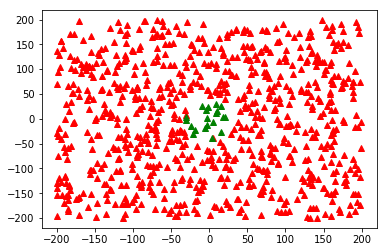

In [85]:
# Plot what was returned
class_predicted = np.argmax(output_1, axis=1)
for i in range(points.shape[0]):
    if(class_predicted[i] == 0):
        plt.plot(points[i, 0], points[i , 1], 'r^')
    else:
        plt.plot(points[i, 0], points[i , 1], 'g^')
        
plt.show()
            